**Example code 18: Simulate the molecular cloning process of pCMV-Target-AID**  
Simulate the construction process of pCMV-Target-AID plasmid. The Target-AID plasmid (pCMV-Target-AID) was constructed by assembling two fragments encoding the N- and C-terminus halves of Target-AID, which were both amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using primer pairs RS045/HM129 and HM128/RS046, respectively, with a backbone fragment amplified from pCMV-ABE7.10 using RS047/RS048. By using leavecomment, the following script allows to leave comments for each operational functions block represent an experimental process.  

In [1]:
import sys 
sys.path.append("../../")
from dna import *
pCMV_ABE             = DNA(record="input/addgene_102919.gbk",project="pCMV_ABE")
pCMV_nCas_PmCDA1_ugi = DNA(record="input/addgene_79620.gbk", project="pCMV-nCas-PmCDA1-ugi")

leavecomment("The N-terminus of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using primer pairs RS045/HM129")
RS047 = DNA(record="input/RS047.fasta", project="RS047") 
RS048 = DNA(record="input/RS048.fasta", project="RS048")
FW = pCMV_ABE.finddna(RS047.seq[-15:],key_attribute="sequence") #Search primer binding region
RV = pCMV_ABE.finddna(RS048.seq[-15:],key_attribute="sequence") #Search primer binding region
frag_1 = joindna(RS047, cropdna(pCMV_ABE,*FW,*RV), flipdna(RS048))

leavecomment("The C-terminus of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using primer pairs HM128/RS046")
RS045 = DNA(record="input/RS045.fasta", project="RS045") 
HM129 = DNA(record="input/HM129.fasta", project="HM129") 
FW = pCMV_nCas_PmCDA1_ugi.finddna(RS045.seq[-15:],key_attribute="sequence") #Search primer binding region
RV = pCMV_nCas_PmCDA1_ugi.finddna(HM129.seq[-15:],key_attribute="sequence") #Search primer binding region
frag_2 = joindna(RS045, cropdna(pCMV_nCas_PmCDA1_ugi,*FW,*RV), flipdna(HM129))

leavecomment("The backbone fragment was amplified from pCMV-ABE7.10 using RS047/RS048")
HM128 = DNA(record="input/HM128.fasta", project="HM128") 
RS046 = DNA(record="input/RS046.fasta", project="RS046")
FW = pCMV_nCas_PmCDA1_ugi.finddna(HM128.seq[-15:],key_attribute="sequence")
RV = pCMV_nCas_PmCDA1_ugi.finddna(RS046.seq[-15:],key_attribute="sequence")
frag_3 = joindna(HM128, cropdna(pCMV_nCas_PmCDA1_ugi,*FW,*RV), flipdna(RS046))

leavecomment("The Target-AID plasmid (pCMV-Target-AID) was constructed by assembling two insert fragments and a backbone fragments.")
frag_1 = modifyends(frag_1,"*{25}/-{25}","-{25}/*{25}") 
frag_2 = modifyends(frag_2,"*{25}/-{25}","-{28}/*{28}")
frag_3 = modifyends(frag_3,"*{28}/-{28}","-{25}/*{25}")
pCMV_Target_AID = joindna(frag_1,frag_2,frag_3,topology="circular",project="pCMV-Target-AID")
pCMV_Target_AID.writedna("pCMV-Target-AID.gbk")
pCMV_Target_AID.printfeature()

feature_id  qualifier:label     feature_type  start  end   strand  
3100        pCMV-Target-AID     source        0      8752  +       
100         null                source        35     3371  +       
200         BGH-rev             primer_bind   37     55    -       
300         bGH poly(A) signal  polyA_signal  43     268   +       
400         M13 rev             primer_bind   338    355   -       
500         M13 Reverse         primer_bind   338    355   -       
600         M13/pUC Reverse     primer_bind   351    374   -       
700         lac operator        protein_bind  362    379   +       
800         lac promoter        promoter      386    417   -       
900         CAP binding site    protein_bind  431    453   +       
1000        L4440               primer_bind   569    587   -       
1100        ori                 rep_origin    740    1329  -       
1200        pBR322ori-F         primer_bind   820    840   -       
1300        AmpR                CDS           14

In [2]:
exporthistory(pCMV_Target_AID)

from dna import *
DNA.dna_dict['pCMV_ABE'] = DNA(seq=None, record='input/addgene_102919.gbk', project='pCMV_ABE', topology='linear', format=None)
DNA.dna_dict['pCMV-nCas-PmCDA1-ugi'] = DNA(seq=None, record='input/addgene_79620.gbk', project='pCMV-nCas-PmCDA1-ugi', topology='linear', format=None)

#The N-terminus of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using primer pairs RS045/HM129
DNA.dna_dict['RS047'] = DNA(seq=None, record='input/RS047.fasta', project='RS047', topology='linear', format=None)
DNA.dna_dict['RS048'] = DNA(seq=None, record='input/RS048.fasta', project='RS048', topology='linear', format=None)
DNA.dna_dict['pCMV_ABE_0'] = cropdna(DNA.dna_dict['pCMV_ABE'], start='5277/5277', end='8613/8613', project='pCMV_ABE')
DNA.dna_dict['RS048_0'] = flipdna(DNA.dna_dict['RS048'], project='RS048')
DNA.dna_dict['RS047_0'] = joindna(*[DNA.dna_dict['RS047'],DNA.dna_dict['pCMV_ABE_0'],DNA.dna_dict['RS048_0']], topology='linear', project=

In [3]:
from dna import *
DNA.dna_dict['pCMV_ABE'] = DNA(seq=None, record='input/addgene_102919.gbk', project='pCMV_ABE', topology='linear', format=None)
DNA.dna_dict['pCMV-nCas-PmCDA1-ugi'] = DNA(seq=None, record='input/addgene_79620.gbk', project='pCMV-nCas-PmCDA1-ugi', topology='linear', format=None)

#The N-terminus of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using primer pairs RS045/HM129
DNA.dna_dict['RS047'] = DNA(seq=None, record='input/RS047.fasta', project='RS047', topology='linear', format=None)
DNA.dna_dict['RS048'] = DNA(seq=None, record='input/RS048.fasta', project='RS048', topology='linear', format=None)
DNA.dna_dict['pCMV_ABE_0'] = cropdna(DNA.dna_dict['pCMV_ABE'], start='5277/5277', end='8613/8613', project='pCMV_ABE')
DNA.dna_dict['RS048_0'] = flipdna(DNA.dna_dict['RS048'], project='RS048')
DNA.dna_dict['RS047_0'] = joindna(*[DNA.dna_dict['RS047'],DNA.dna_dict['pCMV_ABE_0'],DNA.dna_dict['RS048_0']], topology='linear', project='RS047')

#The C-terminus of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using primer pairs HM128/RS046
DNA.dna_dict['RS045'] = DNA(seq=None, record='input/RS045.fasta', project='RS045', topology='linear', format=None)
DNA.dna_dict['HM129'] = DNA(seq=None, record='input/HM129.fasta', project='HM129', topology='linear', format=None)
DNA.dna_dict['pCMV-nCas-PmCDA1-ugi_0'] = cropdna(DNA.dna_dict['pCMV-nCas-PmCDA1-ugi'], start='3914/3914', end='6442/6442', project='pCMV-nCas-PmCDA1-ugi')
DNA.dna_dict['HM129_0'] = flipdna(DNA.dna_dict['HM129'], project='HM129')
DNA.dna_dict['RS045_0'] = joindna(*[DNA.dna_dict['RS045'],DNA.dna_dict['pCMV-nCas-PmCDA1-ugi_0'],DNA.dna_dict['HM129_0']], topology='linear', project='RS045')

#The backbone fragment was amplified from pCMV-ABE7.10 using RS047/RS048
DNA.dna_dict['HM128'] = DNA(seq=None, record='input/HM128.fasta', project='HM128', topology='linear', format=None)
DNA.dna_dict['RS046'] = DNA(seq=None, record='input/RS046.fasta', project='RS046', topology='linear', format=None)
DNA.dna_dict['pCMV-nCas-PmCDA1-ugi_1'] = cropdna(DNA.dna_dict['pCMV-nCas-PmCDA1-ugi'], start='6484/6484', end='9244/9244', project='pCMV-nCas-PmCDA1-ugi')
DNA.dna_dict['RS046_0'] = flipdna(DNA.dna_dict['RS046'], project='RS046')
DNA.dna_dict['HM128_0'] = joindna(*[DNA.dna_dict['HM128'],DNA.dna_dict['pCMV-nCas-PmCDA1-ugi_1'],DNA.dna_dict['RS046_0']], topology='linear', project='HM128')

#The Target-AID plasmid (pCMV-Target-AID) was constructed by assembling two insert fragments and a backbone fragments.
DNA.dna_dict['RS047_1'] = modifyends(DNA.dna_dict['RS047_0'], left='*{25}/-{25}', right='-{25}/*{25}', project='RS047')
DNA.dna_dict['RS045_1'] = modifyends(DNA.dna_dict['RS045_0'], left='*{25}/-{25}', right='-{28}/*{28}', project='RS045')
DNA.dna_dict['HM128_1'] = modifyends(DNA.dna_dict['HM128_0'], left='*{28}/-{28}', right='-{25}/*{25}', project='HM128')
DNA.dna_dict['pCMV-Target-AID'] = joindna(*[DNA.dna_dict['RS047_1'],DNA.dna_dict['RS045_1'],DNA.dna_dict['HM128_1']], topology='circular', project='pCMV-Target-AID')
DNA.dna_dict['pCMV-Target-AID'].writedna('reconstructed_pCMV-Target-AID.gbk')

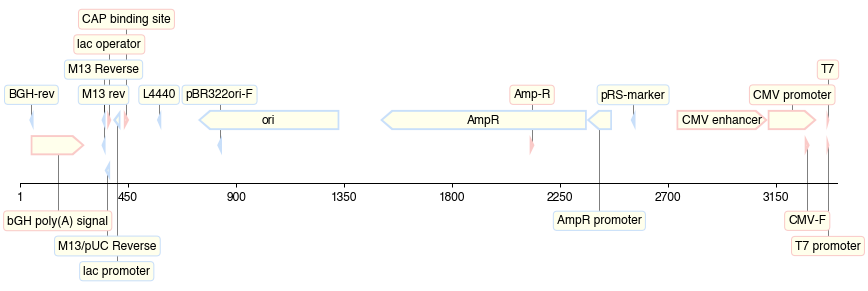

In [4]:
visualize(frag_1)

ValueError: max() arg is an empty sequence

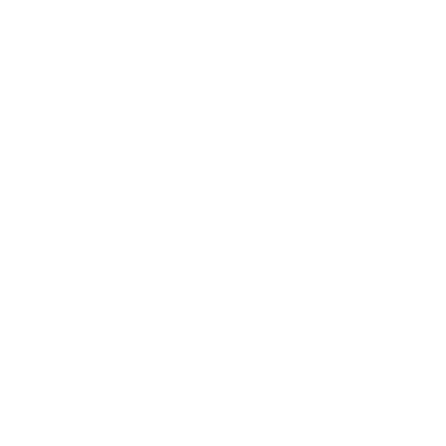

In [5]:
visualize(pCMV_Target_AID, mapview="circular")